 # TP1. Fully Connected Networks
 
 #### Sciences U, 2019-2020

## Part 1. Classification on Tabular data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Here is an example with dummy data, 3 classes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
centers = [(0, -5), (0, 5), (5, 0)]
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=1.5,
                  centers=centers)

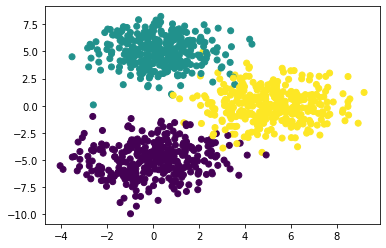

In [4]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [5]:
X[:10]

array([[-0.19908379,  3.50095063],
       [ 0.81569851, -7.42686965],
       [ 2.67609143, -0.41325408],
       [ 1.18505046,  4.15107676],
       [ 6.2878951 ,  0.98764878],
       [-3.52793145, -4.73557488],
       [-0.32407818,  6.62235448],
       [ 4.54375919, -2.66920038],
       [-0.58956862,  4.67569237],
       [ 2.16487468,  4.95298499]])

In [6]:
y[:10]

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 2])

**Question 1. Convert y to categorical data (one-hot vectors) using Keras to_categorical**

In [7]:
categorical_data = to_categorical(y)
categorical_data

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

**Question 2. Split data into train/test with ration 2:1 ussing Sklearn train_test_split**

In [8]:
train, test = train_test_split(categorical_data, test_size=0.33)
X_train, X_test, y_train, y_test = train_test_split(X, categorical_data, test_size=0.33, random_state=42)

In [9]:
# Input train
X_train.shape

(670, 2)

In [10]:
# Output train
y_train.shape

(670, 3)

In [11]:
# Input test
X_test.shape

(330, 2)

In [12]:
# Output test
y_test.shape

(330, 3)

Here is our model with 3 layers

In [13]:
model = Sequential()
model.add(Dense(6, input_dim=2, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='sigmoid')) # Add layer from question 3
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 21        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64)


Epoch 1/50
670/670 [==============================] - 1s 2ms/step - loss: 1.1606 - accuracy: 0.3284
Epoch 2/50
670/670 [==============================] - 0s 82us/step - loss: 1.1155 - accuracy: 0.3284
Epoch 3/50
670/670 [==============================] - 0s 78us/step - loss: 1.0732 - accuracy: 0.3284
Epoch 4/50
670/670 [==============================] - 0s 61us/step - loss: 1.0359 - accuracy: 0.3299
Epoch 5/50
670/670 [==============================] - 0s 65us/step - loss: 1.0011 - accuracy: 0.4299
Epoch 6/50
670/670 [==============================] - 0s 72us/step - loss: 0.9698 - accuracy: 0.5731
Epoch 7/50
670/670 [==============================] - 0s 73us/step - loss: 0.9393 - accuracy: 0.6403
Epoch 8/50
670/670 [==============================] - 0s 62us/step - loss: 0.9105 - accuracy: 0.6612
Epoch 9/50
670/670 [==============================] - 0s 101us/step - loss: 0.8816 - accuracy: 0.6701
Epoch 10/50
670/670 [==============================] - 0s 58us/step - loss: 0.8529 - accur

In [15]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('train_acc', train_acc)
print('test_acc', test_acc)

330/330 [==============================] - 0s 87us/step
train_acc 0.9820895791053772
test_acc 0.9848484992980957


**Note:** If you run fit again, model will continue to train. Re-run the model block to reset model

**Question 3: Change the model architecture to see whether there is improvement**

In [16]:
print('train_acc', train_acc)
print('test_acc', test_acc)

train_acc 0.9820895791053772
test_acc 0.9848484992980957


**Question 4: Change 3 blob centers to identical at (0,0) and redo the training**

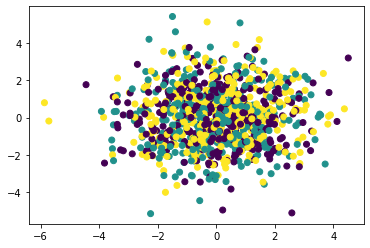

In [17]:
centers = [(0, 0), (0, 0), (0, 0)]
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=1.5,
                  centers=centers)
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [18]:
yc = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, yc, test_size=0.33, random_state=42)

In [19]:
model = Sequential()
model.add(Dense(6, input_dim=2, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
670/670 [==============================] - 1s 2ms/step - loss: 0.6455 - accuracy: 0.6662
Epoch 2/50
670/670 [==============================] - 0s 90us/step - loss: 0.6434 - accuracy: 0.6667
Epoch 3/50
670/670 [==============================] - 0s 152us/step - loss: 0.6415 - accuracy: 0.6667
Epoch 4/50
670/670 [==============================] - 0s 119us/step - loss: 0.6401 - accuracy: 0.6667
Epoch 5/50
670/670 [==============================] - 0s 74us/step - loss: 0.6392 - accuracy: 0.6667
Epoch 6/50
670/670 [==============================] - 0s 86us/step - loss: 0.6386 - accuracy: 0.6667
Epoch 7/50
670/670 [==============================] - 0s 79us/step - loss: 0.6378 - accuracy: 0.6667
Epoch 8/50
670/670 [==============================] - 0s 119us/step - loss: 0.6375 - accuracy: 0.6667
Epoch 9/50
670/670 [==============================] - 0s 102us/step - loss: 0.6370 - accuracy: 0

In [21]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('train_acc', train_acc)
print('test_acc', test_acc)

330/330 [==============================] - 0s 25us/step
train_acc 0.6681591868400574
test_acc 0.6646465063095093


**Question 5: In this case, try to make the model to overfit with near 100% accuracy on training data while 33% on test data**

In [22]:
model = Sequential()
model.add(Dense(6, input_dim=2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(3, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )

In [23]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64)

Epoch 1/50
670/670 [==============================] - 1s 2ms/step - loss: 0.6470 - accuracy: 0.6612
Epoch 2/50
670/670 [==============================] - 0s 85us/step - loss: 0.6381 - accuracy: 0.6662
Epoch 3/50
670/670 [==============================] - 0s 83us/step - loss: 0.6379 - accuracy: 0.6657
Epoch 4/50
670/670 [==============================] - 0s 72us/step - loss: 0.6383 - accuracy: 0.6672
Epoch 5/50
670/670 [==============================] - 0s 74us/step - loss: 0.6397 - accuracy: 0.6662
Epoch 6/50
670/670 [==============================] - 0s 74us/step - loss: 0.6390 - accuracy: 0.6647
Epoch 7/50
670/670 [==============================] - 0s 83us/step - loss: 0.6380 - accuracy: 0.6662
Epoch 8/50
670/670 [==============================] - 0s 73us/step - loss: 0.6371 - accuracy: 0.6662
Epoch 9/50
670/670 [==============================] - 0s 72us/step - loss: 0.6368 - accuracy: 0.6667
Epoch 10/50
670/670 [==============================] - 0s 82us/step - loss: 0.6357 - accurac

## Titanic Dataset

**Question 6: Load Titanic dataset using pandas (file titanic.csv) and print out first 10 rows** 

In [24]:
file_path = '/home/matt/EII/Archis des applications (UC8-A.2)/w1-a/data/titanic.csv'
titanic = pd.read_csv(file_path)
print(titanic.head(n=10))

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   
5         0       3                                    Mr. James Moran   
6         0       1                             Mr. Timothy J McCarthy   
7         0       3                      Master. Gosta Leonard Palsson   
8         1       3   Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   
9         1       2                 Mrs. Nicholas (Adele Achem) Nasser   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                

**Question 7: Extract column ``survived`` as labels y , and the rest (except ``name``) as data X**

In [25]:
y = titanic['Survived']
X = titanic.loc[:, titanic.columns != 'Name']
del X['Survived']
print(y)
print(X)

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
857    0
858    1
859    0
860    0
861    1
862    1
863    0
864    0
865    1
866    0
867    1
868    0
869    0
870    1
871    1
872    0
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    0
881    0
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64
     Pclass     Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0         3    male  22.0                        1                        0   
1         1  female  38.0                        1                        0   
2         3  female  26.0                        0                        0   
3         1  female  35.0                        1                        0   
4         3   

**Question 8. Convert categorical data (eg. Gender) to numeric (as NN only take numeric data)**

In [26]:
X['Sex'].replace(['female','male'],[0,1],inplace=True)

/home/matt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [27]:
# Normalize titanic datas 
X = (X - np.mean(X))/np.std(X)

In [28]:
X.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0.830524,0.740266,-0.529366,0.429904,-0.474981,-0.503586
1,-1.561277,-1.350867,0.604265,0.429904,-0.474981,0.783412
2,0.830524,-1.350867,-0.245958,-0.475856,-0.474981,-0.490020
3,-1.561277,-1.350867,0.391709,0.429904,-0.474981,0.417948
4,0.830524,0.740266,0.391709,-0.475856,-0.474981,-0.487507


**Question 9: Split train-test with ratio 2:1**

In [29]:
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
X_train.shape

(594, 6)

In [31]:
y_train.shape

(594, 2)

In [32]:
X_test.shape

(293, 6)

In [33]:
y_test.shape

(293, 2)

**Question 10: Adapt the above NN to train on Titanic dataset**

In [34]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 14        
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64)

Epoch 1/50
594/594 [==============================] - 0s 804us/step - loss: 0.9336 - accuracy: 0.4040
Epoch 2/50
594/594 [==============================] - 0s 47us/step - loss: 0.8753 - accuracy: 0.4091
Epoch 3/50
594/594 [==============================] - 0s 46us/step - loss: 0.8235 - accuracy: 0.4209
Epoch 4/50
594/594 [==============================] - 0s 45us/step - loss: 0.7846 - accuracy: 0.4343
Epoch 5/50
594/594 [==============================] - 0s 44us/step - loss: 0.7544 - accuracy: 0.4545
Epoch 6/50
594/594 [==============================] - 0s 44us/step - loss: 0.7309 - accuracy: 0.4764
Epoch 7/50
594/594 [==============================] - 0s 44us/step - loss: 0.7124 - accuracy: 0.4832
Epoch 8/50
594/594 [==============================] - 0s 46us/step - loss: 0.6981 - accuracy: 0.4848
Epoch 9/50
594/594 [==============================] - 0s 45us/step - loss: 0.6866 - accuracy: 0.5960
Epoch 10/50
594/594 [==============================] - 0s 59us/step - loss: 0.6763 - accur

In [36]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('train_acc', train_acc)
print('test_acc', test_acc)

293/293 [==============================] - 0s 34us/step
train_acc 0.8333333134651184
test_acc 0.788395881652832


**Question 11: How to test accuracy of test data after each epoch? (hint: use validation_data)**

In [37]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 14        
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=64,
          validation_data=(X_train, y_train)
         )

Train on 594 samples, validate on 594 samples
Epoch 1/100
594/594 [==============================] - 1s 1ms/step - loss: 0.4589 - accuracy: 0.8333 - val_loss: 0.4555 - val_accuracy: 0.8333
Epoch 2/100
594/594 [==============================] - 0s 98us/step - loss: 0.4543 - accuracy: 0.8350 - val_loss: 0.4521 - val_accuracy: 0.8350
Epoch 3/100
594/594 [==============================] - 0s 85us/step - loss: 0.4513 - accuracy: 0.8367 - val_loss: 0.4493 - val_accuracy: 0.8367
Epoch 4/100
594/594 [==============================] - 0s 129us/step - loss: 0.4484 - accuracy: 0.8367 - val_loss: 0.4466 - val_accuracy: 0.8367
Epoch 5/100
594/594 [==============================] - 0s 100us/step - loss: 0.4459 - accuracy: 0.8367 - val_loss: 0.4442 - val_accuracy: 0.8367
Epoch 6/100
594/594 [==============================] - 0s 80us/step - loss: 0.4434 - accuracy: 0.8350 - val_loss: 0.4419 - val_accuracy: 0.8367
Epoch 7/100
594/594 [==============================] - 0s 87us/step - loss: 0.4410 - accu

594/594 [==============================] - 0s 72us/step - loss: 0.3944 - accuracy: 0.8485 - val_loss: 0.3940 - val_accuracy: 0.8485
Epoch 58/100
594/594 [==============================] - 0s 72us/step - loss: 0.3939 - accuracy: 0.8485 - val_loss: 0.3936 - val_accuracy: 0.8468
Epoch 59/100
594/594 [==============================] - 0s 73us/step - loss: 0.3937 - accuracy: 0.8468 - val_loss: 0.3933 - val_accuracy: 0.8468
Epoch 60/100
594/594 [==============================] - 0s 76us/step - loss: 0.3933 - accuracy: 0.8468 - val_loss: 0.3929 - val_accuracy: 0.8502
Epoch 61/100
594/594 [==============================] - 0s 76us/step - loss: 0.3936 - accuracy: 0.8418 - val_loss: 0.3928 - val_accuracy: 0.8451
Epoch 62/100
594/594 [==============================] - 0s 87us/step - loss: 0.3929 - accuracy: 0.8418 - val_loss: 0.3923 - val_accuracy: 0.8451
Epoch 63/100
594/594 [==============================] - 0s 81us/step - loss: 0.3924 - accuracy: 0.8485 - val_loss: 0.3920 - val_accuracy: 0.850

**Question 12: Improving model by changing architecture**

In [39]:
model = Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 130       
Total params: 8,898
Trainable params: 8,898
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=64,
          validation_data=(X_train, y_train)
         )

Train on 594 samples, validate on 594 samples
Epoch 1/50
594/594 [==============================] - 1s 2ms/step - loss: 0.6142 - accuracy: 0.6700 - val_loss: 0.5392 - val_accuracy: 0.8030
Epoch 2/50
594/594 [==============================] - 0s 115us/step - loss: 0.5060 - accuracy: 0.8148 - val_loss: 0.4634 - val_accuracy: 0.8266
Epoch 3/50
594/594 [==============================] - 0s 116us/step - loss: 0.4480 - accuracy: 0.8300 - val_loss: 0.4222 - val_accuracy: 0.8316
Epoch 4/50
594/594 [==============================] - 0s 117us/step - loss: 0.4157 - accuracy: 0.8316 - val_loss: 0.4007 - val_accuracy: 0.8384
Epoch 5/50
594/594 [==============================] - 0s 105us/step - loss: 0.3970 - accuracy: 0.8434 - val_loss: 0.3878 - val_accuracy: 0.8451
Epoch 6/50
594/594 [==============================] - 0s 103us/step - loss: 0.3890 - accuracy: 0.8401 - val_loss: 0.3807 - val_accuracy: 0.8418
Epoch 7/50
594/594 [==============================] - 0s 105us/step - loss: 0.3823 - accurac

**Question 13: How to change learning rate of Adam?**

In [41]:
Adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'],
             )
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 14        
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=64,
          validation_data=(X_train, y_train)
         )

Train on 594 samples, validate on 594 samples
Epoch 1/100
594/594 [==============================] - 1s 1ms/step - loss: 0.6815 - accuracy: 0.6086 - val_loss: 0.6810 - val_accuracy: 0.6162
Epoch 2/100
594/594 [==============================] - 0s 101us/step - loss: 0.6806 - accuracy: 0.6162 - val_loss: 0.6800 - val_accuracy: 0.6162
Epoch 3/100
594/594 [==============================] - 0s 92us/step - loss: 0.6797 - accuracy: 0.6162 - val_loss: 0.6791 - val_accuracy: 0.6162
Epoch 4/100
594/594 [==============================] - 0s 94us/step - loss: 0.6787 - accuracy: 0.6162 - val_loss: 0.6781 - val_accuracy: 0.6162
Epoch 5/100
594/594 [==============================] - 0s 159us/step - loss: 0.6777 - accuracy: 0.6162 - val_loss: 0.6771 - val_accuracy: 0.6162
Epoch 6/100
594/594 [==============================] - 0s 128us/step - loss: 0.6767 - accuracy: 0.6162 - val_loss: 0.6760 - val_accuracy: 0.6162
Epoch 7/100
594/594 [==============================] - 0s 112us/step - loss: 0.6756 - ac

Epoch 57/100
594/594 [==============================] - 0s 103us/step - loss: 0.6080 - accuracy: 0.6162 - val_loss: 0.6073 - val_accuracy: 0.6162
Epoch 58/100
594/594 [==============================] - 0s 96us/step - loss: 0.6068 - accuracy: 0.6162 - val_loss: 0.6061 - val_accuracy: 0.6162
Epoch 59/100
594/594 [==============================] - 0s 91us/step - loss: 0.6056 - accuracy: 0.6162 - val_loss: 0.6048 - val_accuracy: 0.6162
Epoch 60/100
594/594 [==============================] - 0s 104us/step - loss: 0.6043 - accuracy: 0.6162 - val_loss: 0.6036 - val_accuracy: 0.6162
Epoch 61/100
594/594 [==============================] - 0s 93us/step - loss: 0.6031 - accuracy: 0.6162 - val_loss: 0.6024 - val_accuracy: 0.6162
Epoch 62/100
594/594 [==============================] - 0s 97us/step - loss: 0.6019 - accuracy: 0.6162 - val_loss: 0.6011 - val_accuracy: 0.6162
Epoch 63/100
594/594 [==============================] - 0s 97us/step - loss: 0.6006 - accuracy: 0.6162 - val_loss: 0.5999 - val_

In [43]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('train_acc', train_acc)
print('test_acc', test_acc)

293/293 [==============================] - 0s 32us/step
train_acc 0.7845118045806885
test_acc 0.7372013926506042
